# **Zomato :- Order Pattern, User Pattern Analysis & Smart Recommendation System**

## **Key Skills Used :- Python, Pandas, Matplotlib, Numpy, Seaborn etc.**

## **Import Libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
data=pd.read_csv("C:/Users/sachi/Downloads/zomato_20000.csv")
print(data)

       order_id  user_id  restaurant_id   location       cuisine  \
0             1     8270            318  Bangalore          Cafe   
1             2     1860            612    Kolkata  North Indian   
2             3     6390            498     Mumbai       Chinese   
3             4     6191            210  Ahmedabad  North Indian   
4             5     6734            563     Mumbai  North Indian   
...         ...      ...            ...        ...           ...   
19995     19996     4558            797    Kolkata  South Indian   
19996     19997     6293            223       Pune       Italian   
19997     19998     9890            718      Delhi        Bakery   
19998     19999     3853            440      Delhi          Cafe   
19999     20000     2845            617       Pune       Mughlai   

                order_time  items_count  order_value payment_method  \
0      2024-01-16 12:47:00            5       333.92            UPI   
1      2024-01-26 16:02:00            4  

In [3]:
df=pd.DataFrame(data)
print(data)

       order_id  user_id  restaurant_id   location       cuisine  \
0             1     8270            318  Bangalore          Cafe   
1             2     1860            612    Kolkata  North Indian   
2             3     6390            498     Mumbai       Chinese   
3             4     6191            210  Ahmedabad  North Indian   
4             5     6734            563     Mumbai  North Indian   
...         ...      ...            ...        ...           ...   
19995     19996     4558            797    Kolkata  South Indian   
19996     19997     6293            223       Pune       Italian   
19997     19998     9890            718      Delhi        Bakery   
19998     19999     3853            440      Delhi          Cafe   
19999     20000     2845            617       Pune       Mughlai   

                order_time  items_count  order_value payment_method  \
0      2024-01-16 12:47:00            5       333.92            UPI   
1      2024-01-26 16:02:00            4  

## **Handling Missing Value and check data info**

In [4]:
df.head(5)

,order_id,user_id,restaurant_id,location,cuisine,order_time,items_count,order_value,payment_method,delivery_time_minutes,rating,is_repeat_customer
0,1,8270,318,Bangalore,Cafe,2024-01-16 12:47:00,5,333.92,UPI,44,2.0,0
1,2,1860,612,Kolkata,North Indian,2024-01-26 16:02:00,4,236.49,UPI,25,3.0,0
2,3,6390,498,Mumbai,Chinese,2024-01-12 00:53:00,5,777.94,NetBanking,33,1.0,0
3,4,6191,210,Ahmedabad,North Indian,2024-01-16 13:36:00,5,816.93,UPI,32,5.0,0
4,5,6734,563,Mumbai,North Indian,2024-01-25 14:56:00,3,165.64,NetBanking,19,2.0,0


In [5]:
df.tail(5)

,order_id,user_id,restaurant_id,location,cuisine,order_time,items_count,order_value,payment_method,delivery_time_minutes,rating,is_repeat_customer
19995,19996,4558,797,Kolkata,South Indian,2024-01-14 23:20:00,1,204.50,UPI,19,5.0,1
19996,19997,6293,223,Pune,Italian,2024-01-19 19:31:00,1,193.41,NetBanking,35,5.0,1
19997,19998,9890,718,Delhi,Bakery,2024-01-20 07:14:00,3,237.00,Card,34,1.0,0
19998,19999,3853,440,Delhi,Cafe,2024-01-12 08:13:00,3,154.76,NetBanking,30,5.0,0
19999,20000,2845,617,Pune,Mughlai,2024-01-01 06:59:00,3,773.28,NetBanking,20,4.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               20000 non-null  int64  
 1   user_id                20000 non-null  int64  
 2   restaurant_id          20000 non-null  int64  
 3   location               20000 non-null  object 
 4   cuisine                20000 non-null  object 
 5   order_time             20000 non-null  object 
 6   items_count            20000 non-null  int64  
 7   order_value            20000 non-null  float64
 8   payment_method         20000 non-null  object 
 9   delivery_time_minutes  20000 non-null  int64  
 10  rating                 17987 non-null  float64
 11  is_repeat_customer     20000 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.8+ MB


In [7]:
df.describe(include='all')

,order_id,user_id,restaurant_id,location,cuisine,order_time,items_count,order_value,payment_method,delivery_time_minutes,rating,is_repeat_customer
count,20000.000000,20000.000000,20000.000000,20000,20000,20000,20000.000000,20000.000000,20000,20000.000000,17987.000000,20000.000000
unique,NaN,NaN,NaN,8,8,15939,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,NaN,Hyderabad,Bakery,2024-01-29 09:11:00,NaN,NaN,NetBanking,NaN,NaN,NaN
freq,NaN,NaN,NaN,2566,2554,5,NaN,NaN,5036,NaN,NaN,NaN
mean,10000.500000,5485.626000,548.253900,NaN,NaN,NaN,3.999750,650.890461,NaN,34.378900,3.209651,0.297200
std,5773.647028,2600.877312,259.164612,NaN,NaN,NaN,2.002511,316.198317,NaN,11.512561,1.229534,0.457037
min,1.000000,1000.000000,100.000000,NaN,NaN,NaN,1.000000,100.140000,NaN,15.000000,1.000000,0.000000
25%,5000.750000,3218.750000,325.000000,NaN,NaN,NaN,2.000000,376.740000,NaN,25.000000,2.000000,0.000000
50%,10000.500000,5503.000000,550.000000,NaN,NaN,NaN,4.000000,654.480000,NaN,34.000000,3.000000,0.000000
75%,15000.250000,7728.000000,769.000000,NaN,NaN,NaN,6.000000,926.202500,NaN,44.000000,4.000000,1.000000


In [8]:
df.isnull().sum()

order_id                    0
user_id                     0
restaurant_id               0
location                    0
cuisine                     0
order_time                  0
items_count                 0
order_value                 0
payment_method              0
delivery_time_minutes       0
rating                   2013
is_repeat_customer          0
dtype: int64

In [9]:
df.nunique()

order_id                 20000
user_id                   8025
restaurant_id              899
location                     8
cuisine                      8
order_time               15939
items_count                  7
order_value              18308
payment_method               4
delivery_time_minutes       40
rating                       5
is_repeat_customer           2
dtype: int64

In [56]:
df.nunique().sum()

np.int64(63277)

In [10]:
df.shape[0]

20000

In [11]:
df.shape[1]

12

In [12]:
df['rating']=df['rating'].fillna(df['rating'].mean()) #in ths we fill the null value by calculating the avg of rating and then fill.

In [13]:
df.isnull().sum()

order_id                 0
user_id                  0
restaurant_id            0
location                 0
cuisine                  0
order_time               0
items_count              0
order_value              0
payment_method           0
delivery_time_minutes    0
rating                   0
is_repeat_customer       0
dtype: int64

In [14]:
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')


In [15]:
df['order_time'].head()


0   2024-01-16 12:47:00
1   2024-01-26 16:02:00
2   2024-01-12 00:53:00
3   2024-01-16 13:36:00
4   2024-01-25 14:56:00
Name: order_time, dtype: datetime64[ns]

In [16]:
df = df.dropna(subset=['order_time'])


In [17]:
# Convert order time to datetime.
df['order_hour'] = df['order_time'].dt.hour
df['order_dayofweek'] = df['order_time'].dt.day_name()


In [18]:
print(df['order_hour'].unique())
print(df['order_dayofweek'].unique())


[12 16  0 13 14  8  2 15  7 23 11 18  5  4  1  9 20 17  3  6 10 21 22 19]
['Tuesday' 'Friday' 'Thursday' 'Saturday' 'Wednesday' 'Sunday' 'Monday']


In [21]:
df=df[df['delivery_time_minutes']<=120]

In [22]:
# Remove unrealistic delivery times 
df=df[(df['order_value']>0) & (df['order_value']<=5000)]

In [ ]:
df['order_hour']=df['order_time'].dt.hour
df['order_dayofweek']=df['order_time'].dt.day_name()
df['location']=df['location'].astype(str)
df['cuisine']=df['cuisine'].astype(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               20000 non-null  int64         
 1   user_id                20000 non-null  int64         
 2   restaurant_id          20000 non-null  int64         
 3   location               20000 non-null  object        
 4   cuisine                20000 non-null  object        
 5   order_time             20000 non-null  datetime64[ns]
 6   items_count            20000 non-null  int64         
 7   order_value            20000 non-null  float64       
 8   payment_method         20000 non-null  object        
 9   delivery_time_minutes  20000 non-null  int64         
 10  rating                 20000 non-null  float64       
 11  is_repeat_customer     20000 non-null  int64         
 12  order_hour             20000 non-null  int32         
 13  o

## **Q.1 Orders By Hours (When customers order the most).**

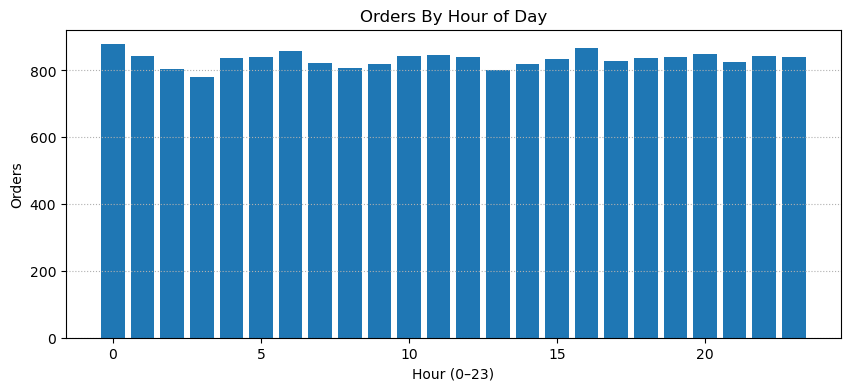

In [23]:
order_by_hours = df['order_hour'].value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.bar(order_by_hours.index, order_by_hours.values)
plt.title("Orders By Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Orders")
plt.grid(axis='y', linestyle=':')
plt.show()


## **Q.2 Orders By Day of Week(In which day of the week Zomato gets more order)**

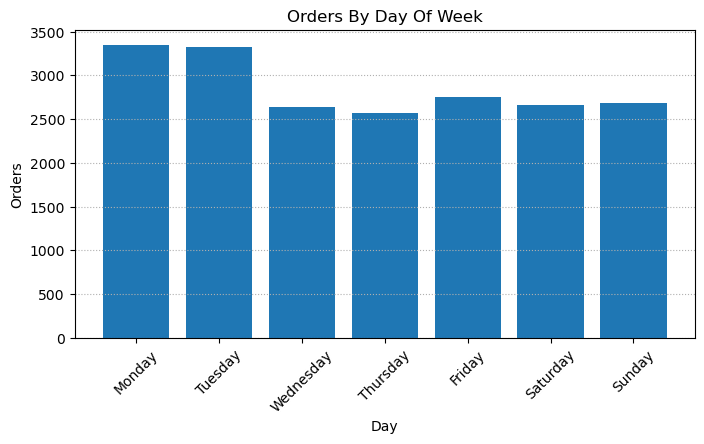

In [36]:
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
orders_by_day=df['order_dayofweek'].value_counts().loc[days]
plt.figure(figsize=(8,4))
plt.bar(orders_by_day.index,orders_by_day.values)
plt.title("Orders By Day Of Week")
plt.xlabel("Day")
plt.ylabel("Orders")
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle=':')
plt.show()

## **Q.3 Top 10 Cuisines Orders**.

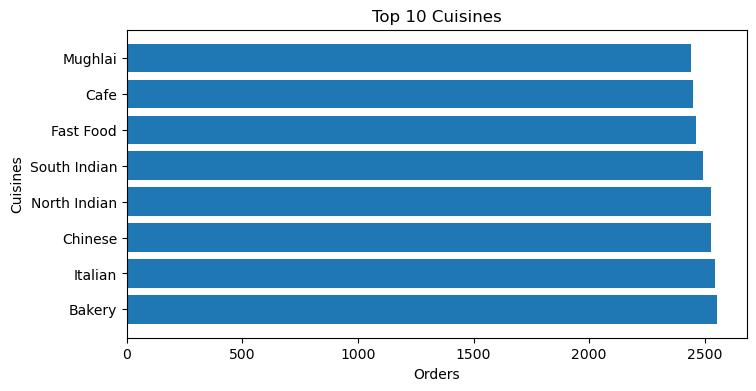

In [27]:
top_cuisines=df['cuisine'].value_counts().head(10)
plt.figure(figsize=(8,4))
plt.barh(top_cuisines.index,top_cuisines.values)
plt.title("Top 10 Cuisines")
plt.xlabel("Orders")
plt.ylabel("Cuisines")
plt.show()

## **Q.4 Top 10 Cities By Orders**

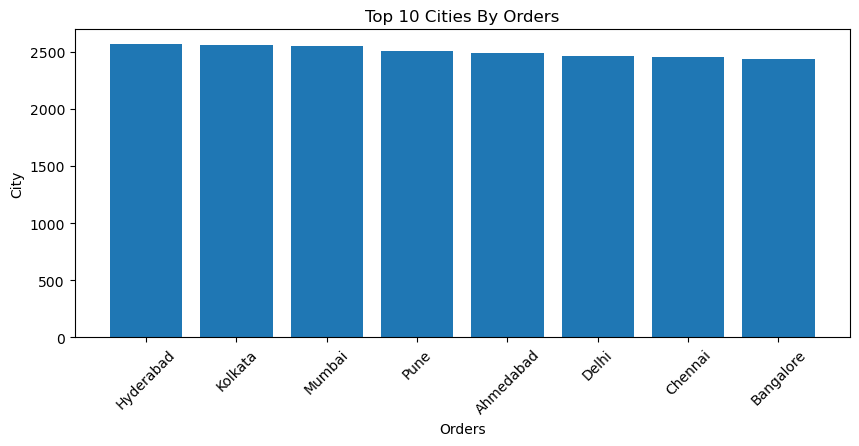

In [33]:
top_cities=df['location'].value_counts().head(10)
plt.figure(figsize=(10,4))
plt.bar(top_cities.index,top_cities.values)
plt.title("Top 10 Cities By Orders")
plt.xlabel("Orders")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.show()

## **Q.5 Distribution Of Order Values**

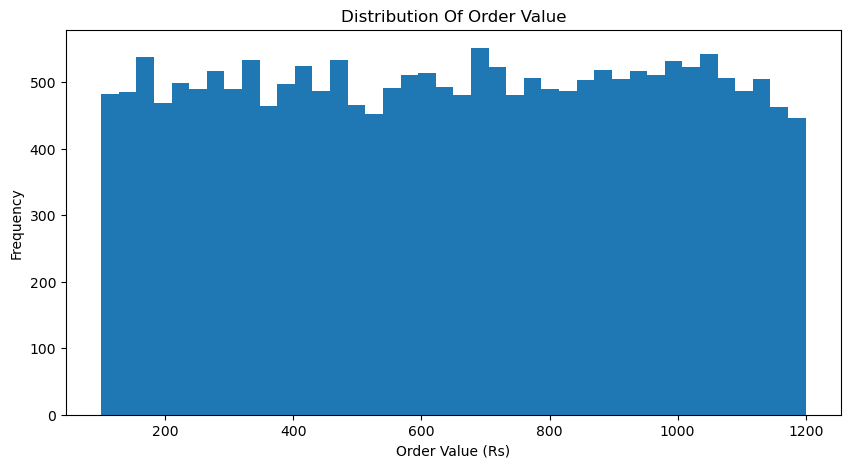

In [42]:
plt.figure(figsize=(10,5))
plt.hist(df['order_value'],bins=40)
plt.title("Distribution Of Order Value")
plt.xlabel("Order Value (Rs)")
plt.ylabel("Frequency")
plt.show()

## **Q.6 Delivery Time by top cities**

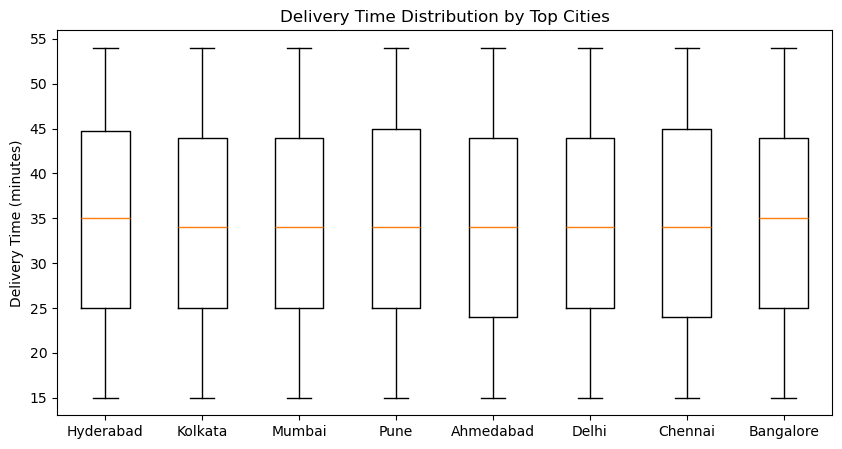

In [44]:
top_city_names=df['location'].value_counts().head(8).index
plt.figure(figsize=(10,5))
plt.boxplot([df[df['location']==city]['delivery_time_minutes'] for city in top_city_names],labels=top_city_names)
plt.title("Delivery Time Distribution by Top Cities")
plt.ylabel("Delivery Time (minutes)")
plt.show()

## **Q.7 Delivery Time vs Rating (Scatter Plot)**

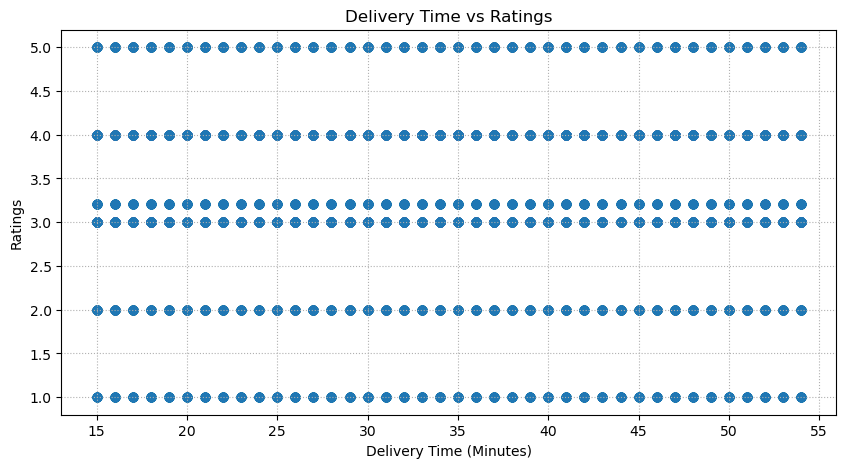

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(df['delivery_time_minutes'],df['rating'],alpha=0.5)
plt.title("Delivery Time vs Ratings")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Ratings")
plt.grid(True,linestyle=':')
plt.show()

## **Q.8 Payment Method Share By Using Pie Chart.**

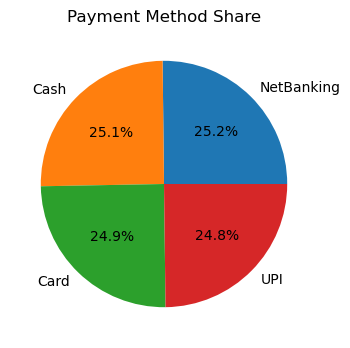

In [48]:
payment_counts=df['payment_method'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(payment_counts.values,labels=payment_counts.index,autopct="%1.1f%%")
plt.title("Payment Method Share")
plt.show()

## **Q.9 Repeat vs New Customers**

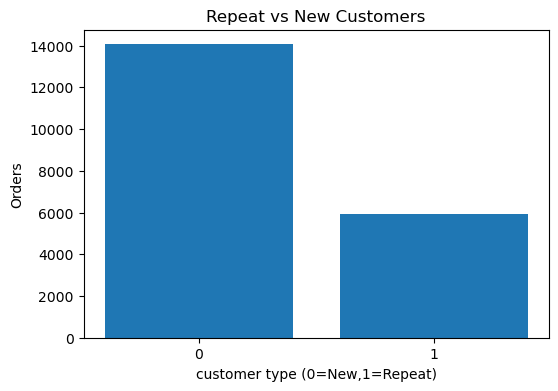

In [49]:
repeat_counts=df['is_repeat_customer'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(repeat_counts.index.astype(str),repeat_counts.values)
plt.title("Repeat vs New Customers")
plt.xlabel("customer type (0=New,1=Repeat)")
plt.ylabel("Orders")
plt.show()

## **Q.10 Hourly Avg Order Values.**

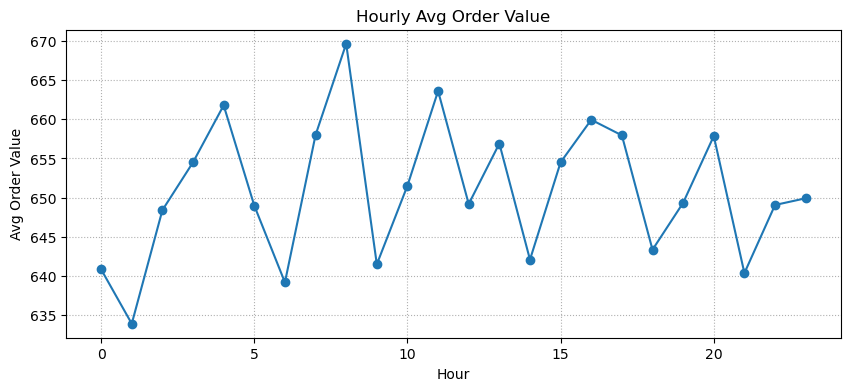

In [52]:
hourly_avg=df.groupby('order_hour')['order_value'].mean()
plt.figure(figsize=(10,4))
plt.plot(hourly_avg.index,hourly_avg.values,marker='o')
plt.title("Hourly Avg Order Value")
plt.xlabel("Hour")
plt.ylabel("Avg Order Value")
plt.grid(linestyle=':')
plt.show()

##  **Q.10. Hourly Average Order Value.**

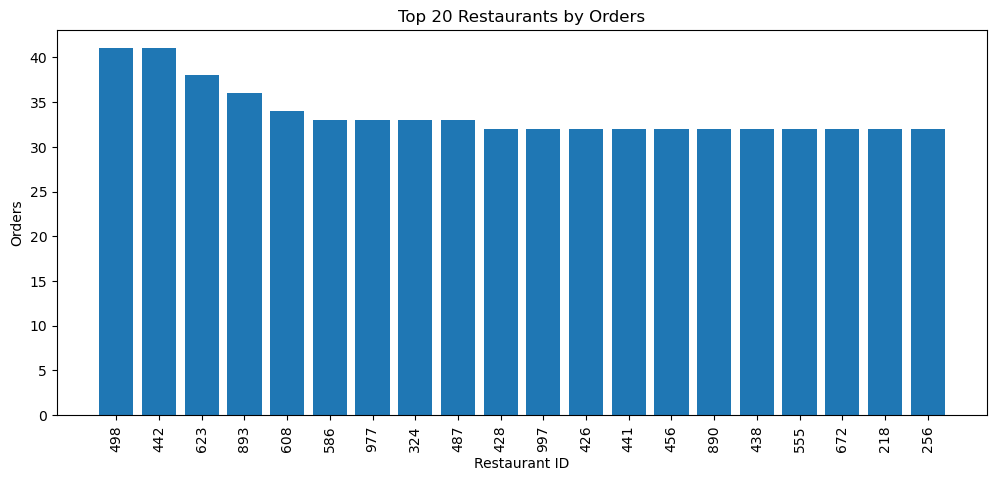

In [53]:
top_restaurants = df['restaurant_id'].value_counts().head(20)

plt.figure(figsize=(12,5))
plt.bar(top_restaurants.index.astype(str), top_restaurants.values)
plt.title("Top 20 Restaurants by Orders")
plt.xlabel("Restaurant ID")
plt.ylabel("Orders")
plt.xticks(rotation=90)
plt.show()


## **Q.11 Avg Rating By Cuisine.**

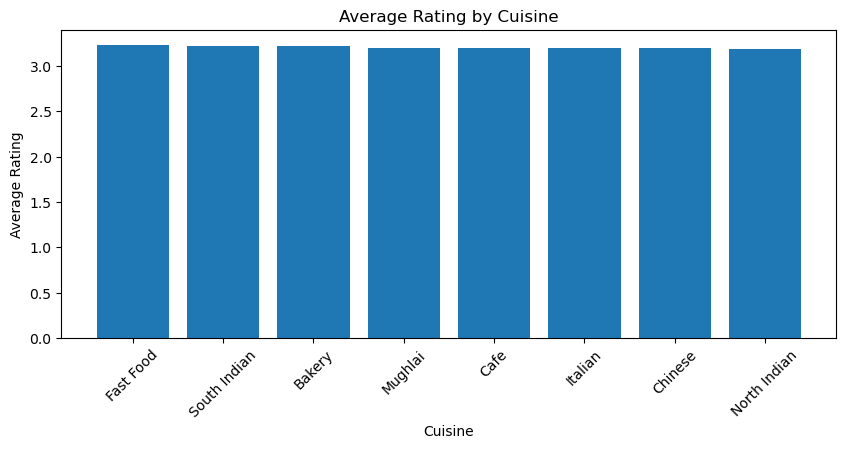

In [54]:
avg_rating_cuisine = df.groupby('cuisine')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,4))
plt.bar(avg_rating_cuisine.index, avg_rating_cuisine.values)
plt.title("Average Rating by Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


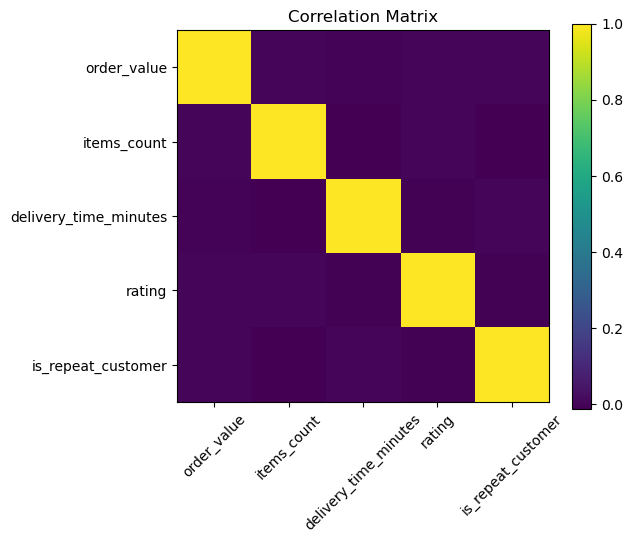

In [55]:
import numpy as np

numeric_cols = ['order_value','items_count','delivery_time_minutes','rating','is_repeat_customer']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(np.arange(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix")
plt.show()


## **Project End.**